<a href="https://colab.research.google.com/github/ianfeekes-sandiego/Machine-Learning/blob/main/obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍗 Obesity

This is a notebook created by **Ian Feekes** for data exploration, analysis, and machine learning on the kaggle obesity competition dataset.

We note that this dataset is synthetic data from a model trained on the Obesity of CVD risk dataset shown here: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

The survey questions for the paper can be found here:
https://www.sciencedirect.com/science/article/pii/S2352340919306985

## ⚙️ Initial Configuration

### Setting up Kaggle API

Enable uploading of the ```kaggle.json``` file which will need to be manually brought in after this command executes.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ifeekes","key":"22a9ee85bb6b8a31e631a11faaebdc49"}'}

Move the ```kaggle.json``` file into the current directory

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # This changes the permissions of the file.

The below cell will install kaggle if not already built-into the environment on colaboratory

In [ ]:
!pip install kaggle

### 🗄️ Downloading Files from Kaggle

In [ ]:
!kaggle competitions download -c playground-series-s4e2

  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 101MB/s]


In [ ]:
!unzip playground-series-s4e2.zip

Archive:  playground-series-s4e2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


The below cell also downloads the [original dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) used for training the model that created the above synthetic dataset.

In [ ]:
!kaggle datasets download -d aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

  0% 0.00/57.5k [00:00<?, ?B/s]
100% 57.5k/57.5k [00:00<00:00, 39.7MB/s]


In [ ]:
!unzip obesity-or-cvd-risk-classifyregressorcluster.zip

Archive:  obesity-or-cvd-risk-classifyregressorcluster.zip
  inflating: ObesityDataSet.csv      


### 📕 Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
# for dirname, _, filenames in os.walk('./'):
    # for filename in filenames:
        # print(os.path.join(dirname, filename))

### Helper Functions

In [ ]:
"""Helper function to show a simple pie chart of a categorical variable for distribution analysis"""
def do_pie(df, col, title=""):
    if col not in df.columns:
        print("Error, column specified is not in the dataframe's columns")
        return
    val_counts = df[col].value_counts()
    plt.pie(val_counts, labels=val_counts.keys(), autopct='%1.1f%%')
    if title == "":
        title = "Distribution of " + col
    plt.title(title)
    plt.show()

## Original DF

In [ ]:
idc_df = pd.read_csv('ObesityDataSet.csv')
idc_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
idc_df.shape

(2111, 17)

In [ ]:
sum(idc_df.duplicated()==True)

24

In [ ]:
idc_df.isnull().sum().sum()

0

```Smoking``` follows similar trends to the original (synthetic) dataset.

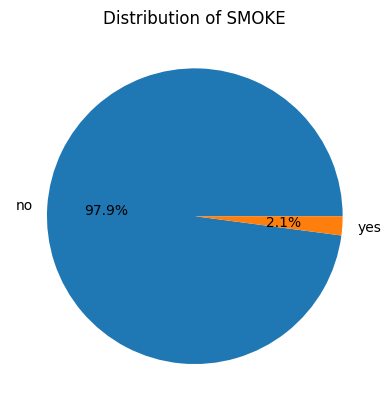

In [ ]:
do_pie(idc_df, 'SMOKE')

The target variable is really-well distributed in the original dataset as well.

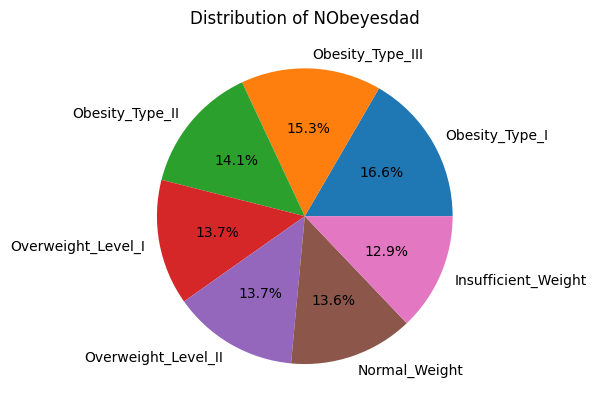

In [ ]:
do_pie(idc_df, 'NObeyesdad')

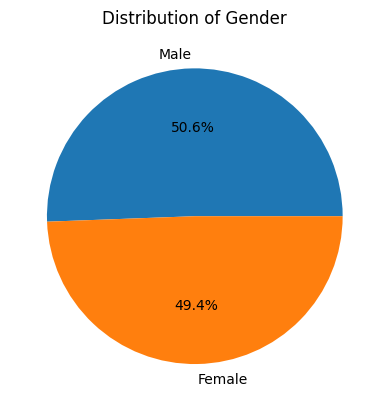

In [ ]:
do_pie(idc_df, 'Gender')

## EDA

In [ ]:
train_df = pd.read_csv('./train.csv')
train_df.shape

(20758, 18)

In [ ]:
train_df = pd.concat([train_df, idc_df], axis=0)

The training dataframe has ```18``` columns and ```20758``` entries.

In [ ]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

There are no missing values evident from the below block.

In [ ]:
train_df.isnull().sum()

id                                2111
Gender                               0
Age                                  0
Height                               0
Weight                               0
family_history_with_overweight       0
FAVC                                 0
FCVC                                 0
NCP                                  0
CAEC                                 0
SMOKE                                0
CH2O                                 0
SCC                                  0
FAF                                  0
TUE                                  0
CALC                                 0
MTRANS                               0
NObeyesdad                           0
dtype: int64

The most apparently numerical variables include **id**, **Age**, **Height**, **Weight**, **FCVC**, **NCP**, **CH2O**, **FAF**,

👵 **Age** looks to be fairly typical ranging between ```14``` and ```61``` years old with an average of ```23```. This will follow a somewhat normal, positive-skew distribution seen by age features in numerous other datasets.

📏 **Height** appears to follow a fairly normal distribution and appears to be measured in meters. No one from this dataset is shorter than 4ft tall and no one is taller than 7ft so there aren't any crazy outliers.

⚖️ **Weight** is surely a variable of interest (given BMI is commonly connected with obesity, maybe with the exception of some bodybuilders). It follows a slight positive skew with most people weighing ~88KG (180lbs ish), no one lighter than 100lbs and few heavier than 300lbs. The variance is apparently a bit higher than other variables we have yet examined.

🥦 **FCVC** is the Frequency of the Consumption of Vegetables. Looks like it varies between 1 and 3 with an average of 2.4.

This is actually the results of the question ```Do you usually eat vegetables with your meals``` on a survey, to which the users would answer "```never```", "```sometimes```" and "```always```".

This variable will need to be encoded for real value.

🍴 **NCP** is the number of primary meals consumed, as the resultant answer to the question ```How many meals do you have daily```. It varies between 1 and 4 meals, but is a floating point variable with many various values (possibly denoting "snacks"?).

In [ ]:
train_df['NCP'].value_counts()

3.000000    15909
1.000000     2175
4.000000      784
2.993623       40
2.695396       26
            ...  
1.028538        1
2.047866        1
2.996543        1
2.609801        1
2.187145        1
Name: NCP, Length: 740, dtype: int64

💦 **CH2O** is the daily water consumption. It is the resultant user survey input to the question ```How much water do you drink daily```, to which the user can answer "```less than a litre```", "```between 1 and 2 litres```", and "```more than 2 litres```".

🏃 **FAF** is the "Frequencidad Fisical Actividad" for "Physical activity frequency." It comes as the survey response prompted by "```How often do you have physical activity```". The possible responses to this include:
* None
* 1 or 2 days
* 2 or 4 days
* 4 or 5 days

I presume this is on a weekly basis? I also hate that several of the bins potentially overlap 🤢, especially for such a significant variable. We note that the frequency of physical activity is given as a floating point response with over 1300 different responses (which one wouldn't think is possible within a week.).

Further data exploration may be useful in binning this variable.

In [ ]:
train_df['FAF'].value_counts()

0.000000    5455
1.000000    4331
2.000000    2574
3.000000     875
1.097905      58
            ... 
2.094479       1
1.305632       1
1.949080       1
0.455422       1
1.094035       1
Name: FAF, Length: 1408, dtype: int64

📲 **TUE** is "Time Using Technology Devices" (probably ```Tiempo Usando Electronicas``` or something of the like). It is the response to "```How much time do you use technological devices such as cell phone, videogames, television, computer and others```," to which the possible answers include:
* 0-2 hours
* 3-5 hours
* More than 5 hours

We note this is yet another presumably categorical variable that has many different resposes. We also clench our fists ✊ in disdain for the surveys lack of overlap in the first two responses.

In [ ]:
train_df['TUE'].value_counts()

0.000000    7123
1.000000    4618
2.000000    1242
0.002600      81
0.723154      66
            ... 
0.770724       1
1.040318       1
0.971425       1
1.945950       1
0.840393       1
Name: TUE, Length: 1329, dtype: int64

In [ ]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000
mean,10378.50000,23.885263,1.700377,87.767610,2.443428,2.754344,2.027442,0.984382,0.620551
std,5992.46278,5.753419,0.087881,26.364243,0.533329,0.712711,0.608901,0.839466,0.602850
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631662,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,10378.50000,22.815416,1.700000,84.000000,2.392665,3.000000,2.000000,1.000000,0.579541
75%,15567.75000,26.000000,1.763029,111.531208,3.000000,3.000000,2.535127,1.596576,1.000000
max,20757.00000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### Looking at ID

Sometimes the **id** is useful in training (such as being aggregates of names or the like). In this dataframe it appears that there is a unique value for each entry of the dataframe and that they simply correspond to the current index of the entry.

Since this observation holds true, along with the initial dataset making no mention of value in the **id**, we can comfortably remove it.

In [ ]:
len(train_df['id'].value_counts().keys()) == train_df.shape[0]

False

In [ ]:
if 'id' in train_df.columns:
    train_df = train_df.drop('id', axis=1)

assert('id' not in train_df.columns)
train_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## 🫧 Cleaning

In [ ]:
df_clean = train_df.copy()

### Categorical Variables

#### ⚤ Gender

In [ ]:
train_df['Gender'].value_counts()

Female    11465
Male      11404
Name: Gender, dtype: int64

The below cell encodes the string values into 0's and 1's for ```Gender``` and replaces the column to be more aptly-named given the new encoding.

In [ ]:
df_clean['Gender_female'] = df_clean['Gender'].apply(lambda x: 1 if x == "Female" else 0)

if 'Gender' in df_clean.columns:
    df_clean = df_clean.drop('Gender', axis=1)

df_clean.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_female
0,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,0
1,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,1
2,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,1
3,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,1
4,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,0


There is a really good split between men and women in the dataset with no imbalances to be considered.

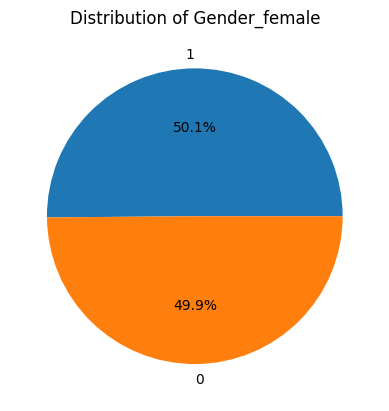

In [ ]:
do_pie(df_clean, 'Gender_female')

#### 🍔 FAVC

Frequent Consumption of High Caloric Food comes as the surveyer's response prompted to "```Do you eat high caloric food frequently```".

This should be a highly-correlated variable which can be corrupted due to surveyor responses.

In [ ]:
if 'FAVC' in df_clean.columns:
    df_clean['FAVC'] = df_clean['FAVC'].apply(lambda x: 1 if x == 'yes' else 0)

df_clean["FAVC"].head()

0    1
1    1
2    1
3    1
4    1
Name: FAVC, dtype: int64

Unfortunately there is a **moderate** distribution problem in the values for frequency of high caloric food: **91.4%** of the users **DO** eat high caloric food.

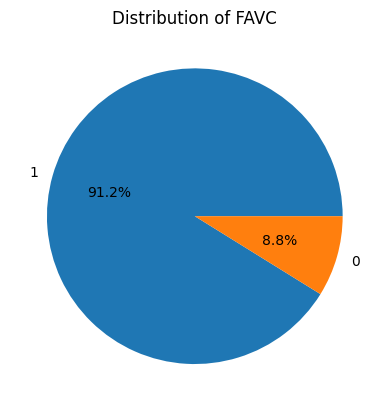

In [ ]:
do_pie(df_clean, "FAVC")

#### 🍪 Consumption of Food Between Meals (CAEC)

This variable is the result of the response to "```Do you eat any food between meals```" to which the response can be:
* ```No```
* ```Sometimes```
* ```Frequently```
* ```Always```

Looking at the distributions in this category, there are lots of poorly-represented data values for the variable if we continue to treat it categorically.

Since the possible answers progress and this variable can be treated as **ordinal**, it will be best to remap experimenting with different values.

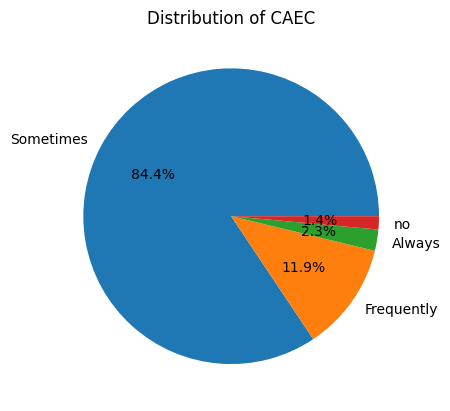

In [ ]:
do_pie(df_clean, 'CAEC')

The below cell treats the snack consumption as an ordinal variable to reduce the data distribution issues.

In [ ]:
df_clean['CAEC'] = df_clean['CAEC'].apply(lambda x: 0 if x == 'no' else 1 if x == 'Sometimes' else 2 if x == 'Frequently' else  3)
df_clean['CAEC'].value_counts()

1    19294
2     2714
3      531
0      330
Name: CAEC, dtype: int64

#### 👨‍👩‍👧‍👦 Family History

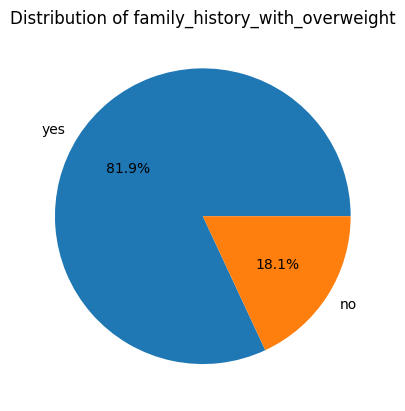

In [ ]:
do_pie(df_clean, 'family_history_with_overweight')

Here we simply encode the string values into **0s** and **1s** for later use with machine learning.

In [ ]:
df_clean['family_history_with_overweight'] = df_clean['family_history_with_overweight'].apply(lambda x: 1 if x == 'yes' else 0)
df_clean["family_history_with_overweight"].head()

0    1
1    1
2    1
3    1
4    1
Name: family_history_with_overweight, dtype: int64

#### SCC (Calorie Consumption Monitoring)

The **Calorie Consumption Monitoring** is the response to "```Do you monitor the calories you eat daily?```" which can be responded to with:
* yes
* no

Only ```3.3%``` of responders monitor their consumption of calories. However, we know from domain knowledge that this should be a high value factor in weight loss (negative correlation with obesity) so it may be worth exploring some downsampling.

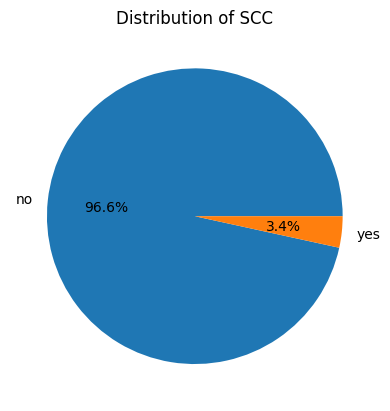

In [ ]:
do_pie(df_clean, 'SCC')

In [ ]:
df_clean['SCC'] = df_clean['SCC'].apply(lambda x: 1 if x == 'yes' else 0)
df_clean['SCC'].head()

0    0
1    0
2    0
3    0
4    0
Name: SCC, dtype: int64

#### 🍷 Consumption of Alcohol (CALC)

The **Consumption of Alcohol** is the result of the prompt "```how often do you drink alcohol```" to which users can answer
* ```I do not drink```
* ```Sometimes```
* ```Frequently```
* ```Always```

This variable exhibits ordinal categorical values which may be desired given data distribution imbalances for constant and never-drinkers.

No one responded that they ```Always``` drink alcohol

In [ ]:
df_clean['CALC'].value_counts()

Sometimes     16467
no             5802
Frequently      599
Always            1
Name: CALC, dtype: int64

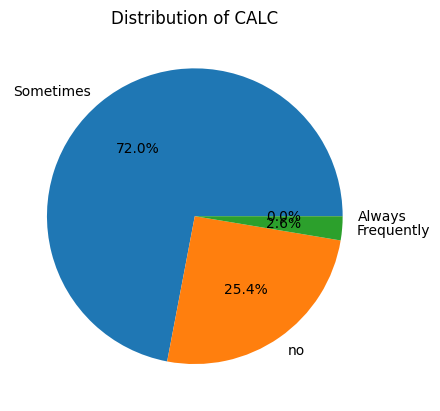

In [ ]:
do_pie(df_clean, 'CALC')

In [ ]:
df_clean['CALC'] = df_clean['CALC'].apply(lambda x: 0 if x == 'no' else 1 if x == 'Sometimes' else 2)
df_clean['CALC'].head(10)

0    1
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: CALC, dtype: int64

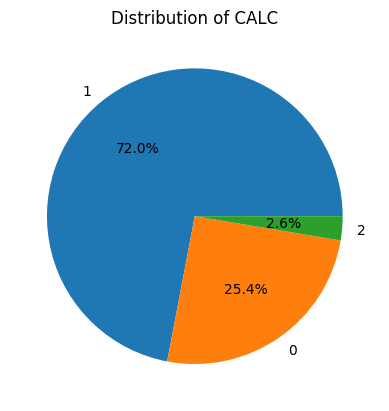

In [ ]:
do_pie(df_clean, 'CALC')

#### 🚌 Method of Transportation (MTRANS)

The **Method of Transportation** comes as the response to the question "```what transportation do you usually use```," which can have the following reponses:
* ```Automobile```
* ```Motorbike```
* ```Bike```
* ```Public Transportation```
* ```Walking```

We see that each of the categories for this variable exist, however all of the categories have severe imbalances in distribution with the exception of ```Public_Transportation``` and```Automobile```.

Some aggregation and downsampling will certainly be needed to gain value from this variable, along with considering ordinalizing it (through ranking the calories burned e.g. Walking, Bike, Public Transit, Motorbike, Automobile)

In [ ]:
df_clean['MTRANS'].value_counts()

Public_Transportation    18267
Automobile                3991
Walking                    523
Motorbike                   49
Bike                        39
Name: MTRANS, dtype: int64

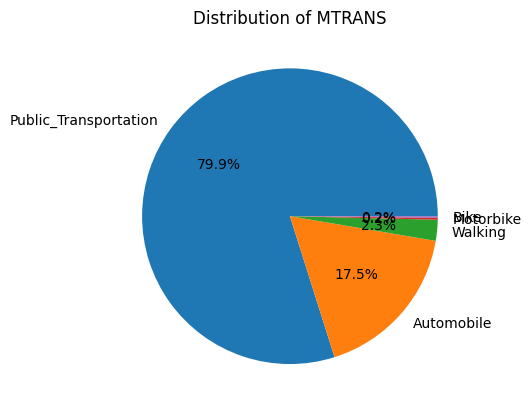

In [ ]:
do_pie(df_clean, 'MTRANS')

Here we do some encoding. We could use a pre-existing label encoder, but since there are only a few categories and we want to aggregate them into physical, driving themself, and taking public transit, we perform manual encoding here.

In [ ]:
if 'MTRANS' in df_clean.columns:
    df_clean['Trans_Public'] = df_clean['MTRANS'].apply(lambda x: 1 if x == 'Public_Transportation' else 0)
    df_clean['Trans_Auto_Motor'] = df_clean['MTRANS'].apply(lambda x: 1 if x == 'Automobile' or x == 'Motorbike' else 0)
    df_clean['Trans_Physical'] = df_clean['MTRANS'].apply(lambda x: 1 if x == 'Walking' or x == 'Bike' else 0)
    df_clean = df_clean.drop('MTRANS', axis=1)

assert('MTRANS' not in df_clean.columns)
df_clean.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,Gender_female,Trans_Public,Trans_Auto_Motor,Trans_Physical
0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,no,2.763573,0,0.000000,0.976473,1,Overweight_Level_II,0,1,0,0
1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,no,2.000000,0,1.000000,1.000000,0,Normal_Weight,1,0,1,0
2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,no,1.910378,0,0.866045,1.673584,0,Insufficient_Weight,1,1,0,0
3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,no,1.674061,0,1.467863,0.780199,1,Obesity_Type_III,1,1,0,0
4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,no,1.979848,0,1.967973,0.931721,1,Overweight_Level_II,0,1,0,0


#### Physical Score

FAF + TUE + Mtrans_Physical

In [ ]:
def create_physical_score(df):
  df_ret = df.copy()
  df_ret['physical_score'] = df_ret['FAF'] + df_ret['TUE'] + df_ret['Trans_Physical']
  return df_ret

df_clean = create_physical_score(df_clean)

#### 🚬 Smoking

**Smoking** is an interesting variable since it can lead to loss of appetite that would have a negative correlation with caloric intake and therefore obesity on a systemic level. However, often times long-term smoking can lead to build-ups of fat in the abdominal organs that has a correlation with obesity.

This is the answer to the survey question "```Do you smoke?```" to which users respond with:
* ```yes```
* ```no```

A staggeringly low amount of respondents report that they ```do smoke```.

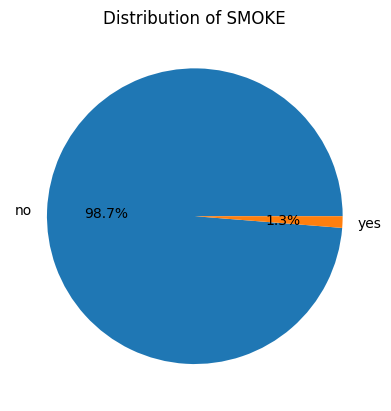

In [ ]:
do_pie(df_clean, 'SMOKE')

Here we simply encode the text values into a boolean.

In [ ]:
df_clean['SMOKE'] = df_clean['SMOKE'].apply(lambda x: 1 if x == 'yes' else 0)
df_clean['SMOKE'].head()

0    0
1    0
2    0
3    0
4    0
Name: SMOKE, dtype: int64

#### 🎯 Examining Target Variable

The target variable, **NObeyesdad**, is the obesity level. It is mostly obtained as an equation of BMI as follows:

```BMI = Weight/(Height^2)```

This means that the categories are as follows:
* ```Normal_Weight``` is 18.5-24.9
* ```Overweight``` is 25-29.9. We note there are two levels of overweight, which may just be aggregates of this interval.
* ```Obesity_Type_I``` is 30.4-34.9
* ```Obesity_Type_II``` is 35-39.9
* ```Obesity_Type_III``` is > 40

There is also an ```Insufficient_Weight``` category for obesity, which one would assume is BMI < 18.5 (but which is not confirmed in the documentation).

We note the split in the categories is fairly well-balaned, which one would expect given they were synthetically balanced.

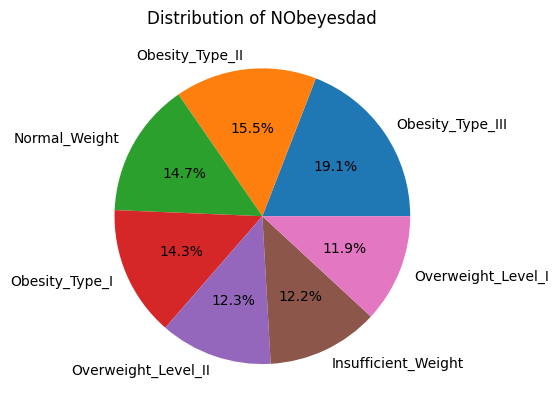

In [ ]:
target= 'NObeyesdad'

do_pie(df_clean, target)

#### 📊 BMI

Unfortunately, the below cells confirm that the values for obesity do not directly follow the patterns for ```BMI```. This may be because of the synthetic data.

In [ ]:
df_clean['BMI'] = df_clean['Weight']/(df_clean['Height']*df_clean['Height'])
df_clean[['BMI', 'NObeyesdad']].head(5)

,BMI,NObeyesdad
0,28.259565,Overweight_Level_II
1,23.422091,Normal_Weight
2,17.126706,Insufficient_Weight
3,44.855798,Obesity_Type_III
4,25.599151,Overweight_Level_II


Looks like the values for ```Overweight_Level_I``` can range from 15.76 to 35.56 (passing the likely possible ranges).

In [ ]:
df_clean[df_clean['NObeyesdad']=="Overweight_Level_I"]['BMI'].describe()

count    2717.000000
mean       26.051959
std         1.685580
min        15.761880
25%        25.401701
50%        25.965812
75%        26.672763
max        35.555556
Name: BMI, dtype: float64

Likewise for the ```Overweight_Level_II``` variable.

In [ ]:
df_clean[df_clean['NObeyesdad']=='Normal_Weight']['BMI'].describe()

count    3369.000000
mean       22.002119
std         2.166096
min        14.631670
25%        20.569330
50%        22.038567
75%        23.665244
max        32.882414
Name: BMI, dtype: float64

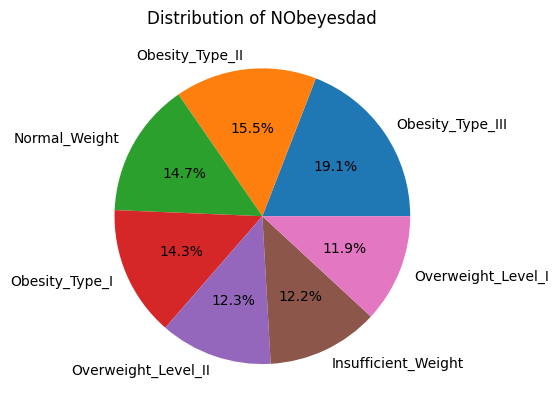

In [ ]:
do_pie(df_clean, 'NObeyesdad')

The below cell ordinalizes the obesity from insufficient weight to the highest level of obesity

In [ ]:
def ordinalize_obesity(x):
    if x == 'Insufficient_Weight':
        return 0
    elif x == 'Normal_Weight':
        return 1
    elif x == 'Overweight_Level_I':
        return 2
    elif x == 'Overweight_Level_II':
        return 3
    elif x == 'Obesity_Type_I':
        return 4
    elif x == 'Obesity_Type_II':
        return 5
    else:
        return 6

df_clean['NObeyesdad'] = df_clean['NObeyesdad'].apply(ordinalize_obesity)
df_clean['NObeyesdad'].head()

0    3
1    1
2    0
3    6
4    3
Name: NObeyesdad, dtype: int64

#### Healthy Eating Score

Healthy Eating Score: You might create a composite score from 'FAVC' (Frequent consumption of high-caloric food), 'FCVC' (Frequency of consumption of vegetables), 'CAEC' (Consumption of food between meals), and 'CALC' (Consumption of alcohol) to gauge overall eating habits.

In [ ]:
def create_healthy_eating_score(df):
  df_ret = df.copy()
  df_ret['healthy_eating_score'] = df_ret['FAVC'] + df_ret['FCVC'] + df_ret['CAEC'] + df_ret['CALC']
  return df_ret

df_clean = create_healthy_eating_score(df_clean)
# df_clean['healthy_eating_score'] = df_clean['FAVC'] + df_clean['FCVC'] + df_clean['CAEC'] + df_clean['CALC']

#### Fam History Bad Habits

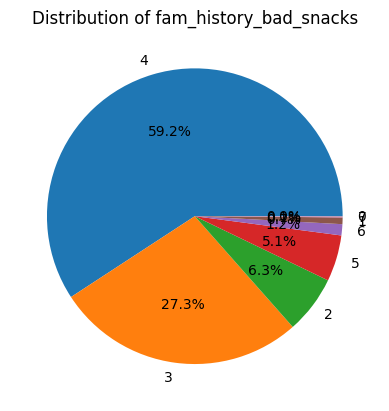

In [ ]:
df_clean['fam_history_bad_snacks'] = df_clean['family_history_with_overweight'] + df_clean['FAVC'] + df_clean['CAEC'] + df_clean['CALC']
do_pie(df_clean, 'fam_history_bad_snacks')

#### Log Transform

In [ ]:
# df_clean['Age'] = np.log(df_clean['Age'])
# df_clean['Height'] = np.log(df_clean['Height'])
# df_clean['Weight'] = np.log(df_clean['Weight'])

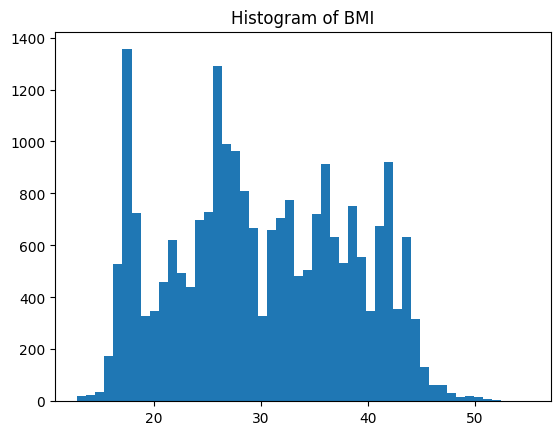

In [ ]:
plt.hist(df_clean['BMI'], bins=50)
plt.title('Histogram of BMI')
plt.show()

## Preprocessing

#### Feature Selection

In [179]:
features = ['Age',
            'Height',
            'Weight',
            #Weight definetely improves accuracy by ~1%
            # 'family_history_with_overweight',
            'FAVC',
            # 'fam_history_bad_snacks',
            'healthy_eating_score',
            'physical_score',
       'FCVC', 'NCP', 'CAEC',
            # 'SMOKE',
            'CH2O', 'SCC',
            'FAF', 'TUE',
       'CALC',
       'Gender_female', 'BMI',
       'Trans_Public',
      #  'Trans_Auto_Motor',
        # 'Trans_Physical'
        ]

### 🤸 Splitting

In [180]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

# Assuming `X` is your features and `y` is your target variable
# Encode target labels if they're not already integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_clean[target])

X_train, X_test, y_train, y_test = train_test_split(df_clean[features],
#     df_clean[target],
    y_encoded,
    random_state=42,
    test_size=0.1,
    # test_size=0.001
    )

X_train.head()

,Age,Height,Weight,FAVC,healthy_eating_score,physical_score,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,Gender_female,BMI,Trans_Public
4949,18.000000,1.610000,64.000000,1,5.00000,4.000000,3.00000,3.000000,1,1.000000,0,2.000000,2.000000,0,1,24.690405,1
907,22.000000,1.725587,80.000000,1,5.00000,3.891180,2.00000,2.976211,1,1.872673,0,2.891180,1.000000,1,0,26.866820,1
10461,21.000000,1.650000,80.000000,0,3.00000,2.000000,2.00000,1.000000,1,2.000000,0,1.000000,1.000000,0,1,29.384757,1
346,18.000000,1.650000,56.000000,1,5.00000,3.000000,2.00000,3.000000,1,2.000000,0,3.000000,0.000000,1,1,20.569330,0
1679,31.761799,1.751688,119.205308,1,5.14961,0.739339,2.14961,3.000000,1,2.133876,0,0.393452,0.345887,1,0,38.849200,0


## 🤖 Machine Learning

### XGBoost

#### Configuring the Model

In [181]:
from xgboost import XGBClassifier

# {'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}

xgb_params =  {'colsample_bytree': 0.9,
               'learning_rate': 0.3,
               'max_depth': 3,
#                'scale_pos_weight': pos_estimate,
              #  'eval_metric': "auc",
               'n_estimators': 150,
#                'early_stopping_rounds': 400,
               'enable_categorical': True,
               'objective': 'multi:softprob',
               'num_class': 6,
               'seed': 42,
            #    'tree_method': 'hist',
               'subsample': 0.9}

# model = XGBClassifier(objective='multi:softprob', num_class=6, seed=42)
xgb_model = XGBClassifier(**xgb_params )

# xgb_model = XGBClassifier()

# xgb_model.fit(X_train, y_train, verbose=50, eval_set=[(X_test, y_test)] )
xgb_model.fit(X_train, y_train, verbose=50 )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)


#### 📊 Plotting Feature Importances

<Figure size 1000x800 with 0 Axes>

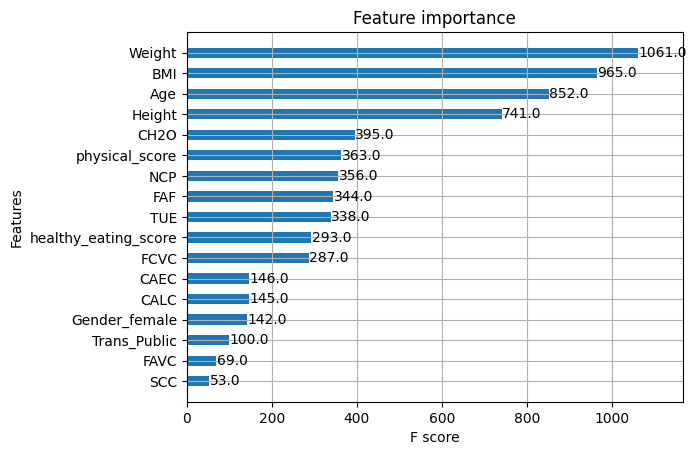

In [182]:
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, height=0.5)
plt.show()

#### 🎶 Hyperparameter Tuning

Best parameters found:  {'max_depth': 3, 'n_estimators': 400}
Best score found:  0.9075034963178791

Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best score found:  0.907503670372285`

In [183]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    # 'n_estimators': [50, 75, 100, 400, 600, 700, 800, 900, 1000],
    'n_estimators': [125, 150, 175],
    # 'learning_rate': [0.1, 0.2, 0.3],
    # 'max_depth': [2, 3, 4, 5, 6, 8, 10, 12],
    'max_depth': [2, 3, 4],
    # 'subsample': [0.8, 0.9, 1.0],
    # 'colsample_bytree': [0.8, 0.9, 1.0],
}

perform_xgb_tuning = False

if perform_xgb_tuning == True:
    # model = XGBClassifier(  **xgb_params)
    model = XGBClassifier()

    grid_search = GridSearchCV(model,
                               param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2,
                               scoring="accuracy")

    grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)
else:
    print("Hyperparameter tuning skipped.")

Hyperparameter tuning skipped.


#### 🤔 Making Predictions

In [184]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_xgboost = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgboost)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred_xgboost))

Accuracy: 90.12%
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       293
           1       0.84      0.88      0.86       323
           2       0.79      0.76      0.77       269
           3       0.77      0.82      0.79       265
           4       0.93      0.88      0.90       341
           5       0.96      0.98      0.97       365
           6       1.00      1.00      1.00       431

    accuracy                           0.90      2287
   macro avg       0.89      0.89      0.89      2287
weighted avg       0.90      0.90      0.90      2287



### LGB

#### Configuring the Model

In [185]:
import lightgbm as lgb

lgbParams = {'objective': 'multiclass',
  'metric': 'multi_logloss',
  'verbosity': -1,
  'boosting_type': 'gbdt',
  'random_state': 42,
  'num_class': 6,
  'learning_rate': 0.03096221154683276,
  'n_estimators': 350,
  'lambda_l1': 0.009667446568254372,
  'lambda_l2': 0.040186414373018,
  'max_depth': 5,
  'colsample_bytree': 0.4097712934687264,
  'subsample': 0.9535797422450176,
  'min_child_samples': 26}

lgb_model_final = lgb.LGBMClassifier(**lgbParams)
lgb_model_final = lgb_model_final.fit(X_train, y_train)


#### 🤔 Making Predictions

In [186]:
y_pred = lgb_model_final.predict(X_test)
accuracy_score(y_test, y_pred)

0.9046786182772191

## Submitting Test Predictions

In [132]:
# /kaggle/input/playground-series-s4e2/sample_submission.csv
# /kaggle/input/playground-series-s4e2/train.csv
# /kaggle/input/playground-series-s4e2/test.csv

df_test = pd.read_csv('./test.csv')
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [133]:
def yes_no_binarize(x):
    if x == 'yes':
        return 1
    return 0

binarization_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

df_test_clean = df_test.copy()

for col in binarization_cols:
    df_test_clean[col] = df_test_clean[col].apply(yes_no_binarize)

df_test_clean.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,Sometimes,0,2.825629,0,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,Sometimes,0,2.621877,0,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,Sometimes,0,2.786417,0,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,Sometimes,0,2.653531,0,0.000000,0.741069,Sometimes,Public_Transportation


In [134]:
def frequency_ordinalize(x):
    if x == 'no':
        return 0
    elif x == 'Sometimes':
        return 1
    elif x == 'Frequently':
        return 2
    elif x == 'Always':
        return 3


frequency_ordinalize_columns = ['CAEC', 'CALC']

for col in frequency_ordinalize_columns:
    df_test_clean[col] = df_test_clean[col].apply(frequency_ordinalize)

df_test_clean.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,Public_Transportation


In [135]:
df_test_clean['Gender_female'] = df_test_clean['Gender'].apply(lambda x: 1 if x == "Female" else 0)
df_test_clean = df_test_clean.drop('Gender', axis=1)

df_test_clean.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Gender_female
0,20758,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,Public_Transportation,0
1,20759,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,Public_Transportation,1
2,20760,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,Public_Transportation,1
3,20761,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,Public_Transportation,0
4,20762,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,Public_Transportation,1


In [136]:
if 'MTRANS' in df_test_clean.columns:
    df_test_clean['Trans_Public'] = df_test_clean['MTRANS'].apply(lambda x: 1 if x == 'Public_Transportation' else 0)
    df_test_clean['Trans_Auto_Motor'] = df_test_clean['MTRANS'].apply(lambda x: 1 if x == 'Automobile' or x == 'Motorbike' else 0)
    df_test_clean['Trans_Physical'] = df_test_clean['MTRANS'].apply(lambda x: 1 if x == 'Walking' or x == 'Bike' else 0)
    df_test_clean = df_test_clean.drop('MTRANS', axis=1)

df_test_clean.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Gender_female,Trans_Public,Trans_Auto_Motor,Trans_Physical
0,20758,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,0,1,0,0
1,20759,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,1,1,0,0
2,20760,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,1,1,0,0
3,20761,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,0,1,0,0
4,20762,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,1,1,0,0


In [137]:
df_test_clean['BMI'] = df_test_clean['Weight']/(df_test_clean['Height'] * df_test_clean['Height'])
df_test_clean['BMI'].head()

0    35.315411
1    25.781250
2    41.324115
3    42.976937
4    39.584143
Name: BMI, dtype: float64

In [138]:
df_test_clean = create_healthy_eating_score(df_test_clean)

In [139]:
df_test_clean = create_physical_score(df_test_clean)

In [140]:
# df_test_clean['Age'] = np.log(df_test_clean['Age'])
# df_test_clean['Height'] = np.log(df_test_clean['Height'])
# df_test_clean['Weight'] = np.log(df_test_clean['Weight'])

In [141]:
# preds = xgb_model.predict(df_test_clean[features])
preds = lgb_model_final.predict(df_test_clean[features])
preds

array([5, 2, 6, ..., 0, 1, 5])

In [142]:
df_sample = pd.read_csv('./sample_submission.csv')
df_sample.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [143]:
df_submit = pd.DataFrame()
df_submit['id'] = df_test['id']
df_submit.head()

,id
0,20758
1,20759
2,20760
3,20761
4,20762


In [144]:
df_submit['NObeyesdad'] = preds
df_submit.head()

,id,NObeyesdad
0,20758,5
1,20759,2
2,20760,6
3,20761,4
4,20762,6


In [145]:
def numeric_to_string_obesity(x):
    if x == 0:
        return 'Insufficient_Weight'
    if x == 1:
        return 'Normal_Weight'
    if x == 2:
        return 'Overweight_Level_I'
    if x == 3:
        return 'Overweight_Level_II'
    if x == 4:
        return 'Obesity_Type_I'
    if x == 5:
        return 'Obesity_Type_II'
    else:
        return 'Obesity_Type_III'

df_submit['NObeyesdad'] = df_submit['NObeyesdad'].apply(numeric_to_string_obesity)
df_submit.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [146]:
df_submit.to_csv('./submission.csv', index=False)

In [147]:
! kaggle competitions submit -c playground-series-s4e2 -f submission.csv -m "Submitted from Colab"

100% 311k/311k [00:00<00:00, 490kB/s]
Successfully submitted to Multi-Class Prediction of Obesity Risk